## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = combined_df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice_in_cleandata = clean_df["Mouse ID"].nunique()
total_mice_in_cleandata

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drugRegimen_df = clean_df.groupby(["Drug Regimen"])

mean = drugRegimen_df["Tumor Volume (mm3)"].mean()
median = drugRegimen_df["Tumor Volume (mm3)"].median()
var = drugRegimen_df["Tumor Volume (mm3)"].var()
std = drugRegimen_df["Tumor Volume (mm3)"].std()
sem = drugRegimen_df["Tumor Volume (mm3)"].sem()

summary_drugregimen_df = pd.DataFrame({"Mean": mean, 
                                       "Median": median, 
                                       "Variance": var, 
                                       "Standard Deviation": std, 
                                       "SEM": sem})
summary_drugregimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_drugregimen_df = summary_drugregimen_df.round(2)
summary_drugregimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

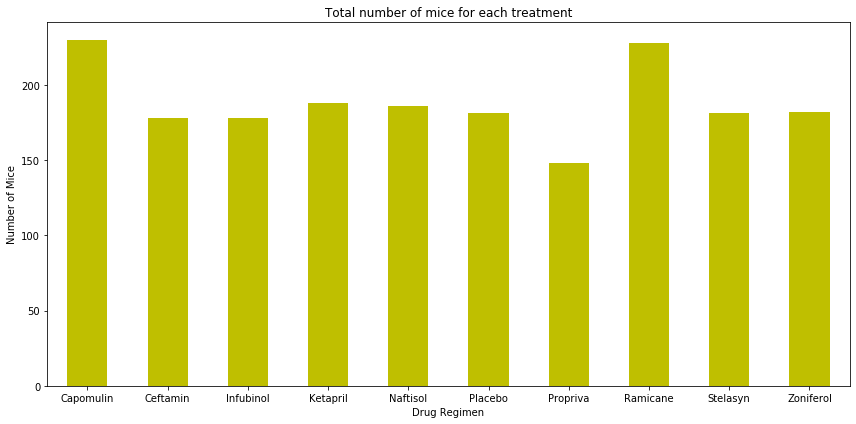

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

bar_chart = mice_count.plot(kind="bar", color="y", rot=0, figsize=(12,6))
bar_chart.set_title("Total number of mice for each treatment")
bar_chart.set_xlabel("Drug Regimen") 
bar_chart.set_ylabel("Number of Mice")
plt.tight_layout()
plt.show()

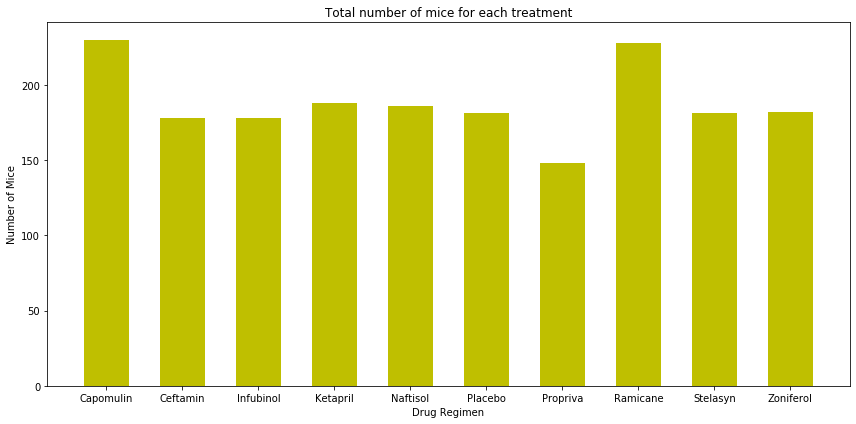

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = mice_count.index
y_axis = mice_count
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis, color="y", align="center", width=0.6)
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()

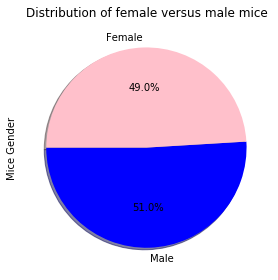

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df = clean_df.rename(columns = {"Sex": "Mice Gender"})
mice_gender = clean_df["Mice Gender"].value_counts()
piechart = mice_gender.plot(kind="pie", autopct="%1.1f%%", colors=["blue","pink"], startangle=180, shadow=True)
piechart.set_title("Distribution of female versus male mice")
plt.tight_layout()

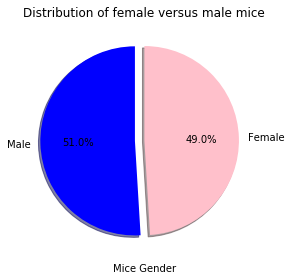

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_gender.index
sizes = mice_gender
colors = ["blue", "pink"]
plt.pie(sizes, explode=(0.1,0), labels=labels, colors=colors, autopct= "%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of female versus male mice")
plt.xlabel("Mice Gender")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_tumor_final = combined_df[(combined_df["Drug Regimen"]=="Capomulin")|
                        (combined_df["Drug Regimen"]=="Ramicane")|
                        (combined_df["Drug Regimen"]=="Infubinal")|
                        (combined_df["Drug Regimen"]=="Ceftamin")]
final_tumorvolume = four_tumor_final.groupby(["Mouse ID"]).max()

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = combined_df.groupby(["Mouse ID"]).max()
greatest_timepoint = greatest_timepoint[["Timepoint"]]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint, combined_df, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

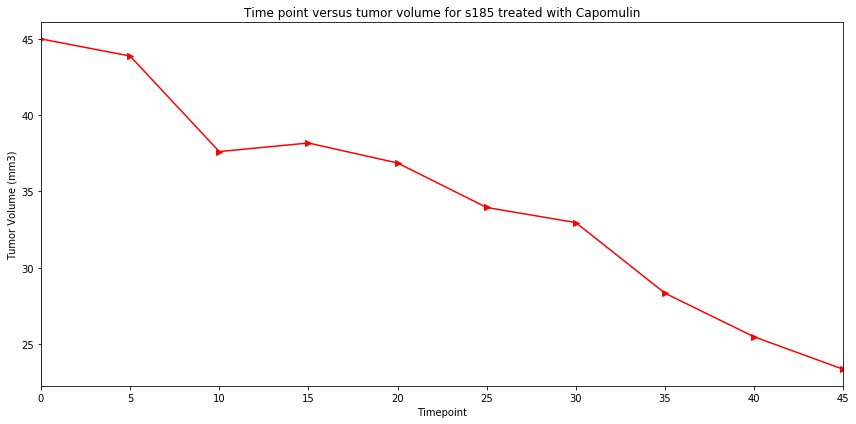

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185 = combined_df.loc[combined_df["Mouse ID"] == "s185"]

plt.figure(figsize=(12,6))
plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"], color='r', marker='>')
plt.title(f"Time point versus tumor volume for s185 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(s185["Timepoint"].min(),s185["Timepoint"].max())
plt.tight_layout()

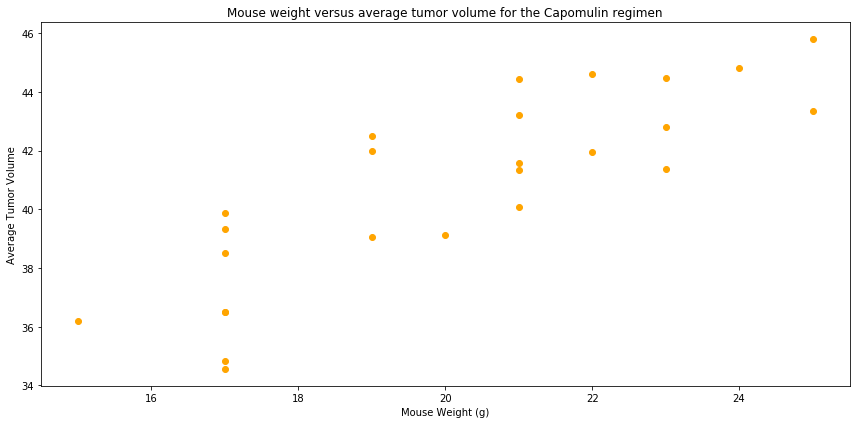

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
mean_tumorvol = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()
plt.figure(figsize=(12,6))
plt.scatter(weight, mean_tumorvol, color='orange')
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.tight_layout()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderror = st.linregress(weight, mean_tumorvol)
print(f"Correlation coefficient is {round(rvalue,2)}")
print(f"Linear regression model is y = {round(intercept,2)} + {round(slope,2)}x")

Correlation coefficient is 0.84
Linear regression model is y = 21.55 + 0.95x


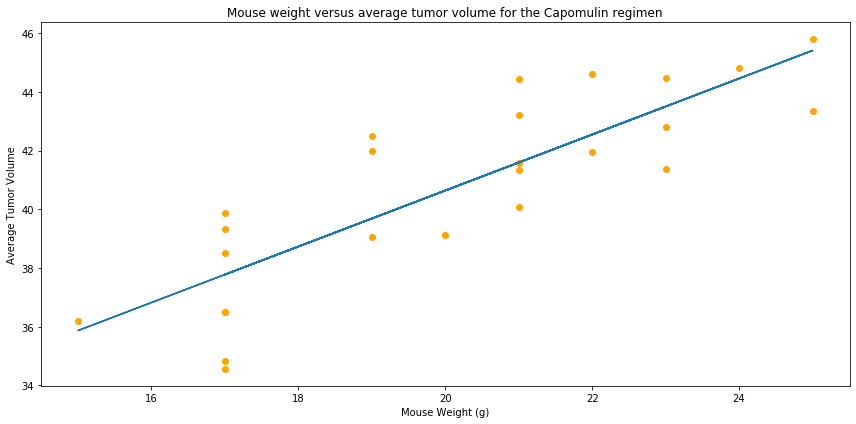

In [20]:
capomulin_regression = weight*slope + intercept
plt.figure(figsize=(12,6))
plt.scatter(weight, mean_tumorvol, color='orange')
plt.plot(weight, capomulin_regression)
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.tight_layout()